# Gender Classification 

## Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', None)

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Read Dataset

In [3]:
gender_df = pd.read_csv('datasets/Transformed Data Set - Sheet1.csv')

In [4]:
gender_df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [5]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


## Data Analysis

### Check data

In [11]:
def check_df(dataframe, head=5):
    print("********************* Show Information about data *********************")
    
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [12]:
check_df(gender_df)

********************* Show Information about data *********************
##################### Shape #####################
(66, 5)
##################### Types #####################
Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object
##################### Head #####################
  Favorite Color Favorite Music Genre Favorite Beverage Favorite Soft Drink Gender
0           Cool                 Rock             Vodka          7UP/Sprite      F
1        Neutral              Hip hop             Vodka     Coca Cola/Pepsi      F
2           Warm                 Rock              Wine     Coca Cola/Pepsi      F
3           Warm     Folk/Traditional           Whiskey               Fanta      F
4           Cool                 Rock             Vodka     Coca Cola/Pepsi      F
##################### Tail #####################
   Favorite Color Favorite Music Genre Favorite Beverag

In [14]:
gender_df.Gender.value_counts()

F    33
M    33
Name: Gender, dtype: int64

In [19]:
category_cols = [col for col in gender_df.columns if str(gender_df[col].dtype) in ["object", "bool", "category"]]

In [20]:
category_cols

['Favorite Color',
 'Favorite Music Genre',
 'Favorite Beverage',
 'Favorite Soft Drink',
 'Gender']

In [21]:
gender_df[category_cols] = gender_df[category_cols].astype('category')

In [22]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Favorite Color        66 non-null     category
 1   Favorite Music Genre  66 non-null     category
 2   Favorite Beverage     66 non-null     category
 3   Favorite Soft Drink   66 non-null     category
 4   Gender                66 non-null     category
dtypes: category(5)
memory usage: 1.5 KB


In [23]:
cat_but_car = [col for col in gender_df.columns if gender_df[col].nunique() > 20 and str(gender_df[col].dtype) in ['category', 'object']]

In [24]:
cat_but_car

[]

In [25]:
category_cols = [col for col in category_cols if col not in cat_but_car]

In [27]:
gender_df['Favorite Color'].value_counts()

Cool       37
Warm       22
Neutral     7
Name: Favorite Color, dtype: int64

In [50]:
def cat_summary(dataframe, col_name, plot=False):
    print(f"Proccess in {col_name} columns")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": round(100 * dataframe[col_name].value_counts() / len(dataframe), 2)}))
    print("****************************************************")

    if plot:
        sns.countplot(x=col_name, data=dataframe)
        plt.show(block=True)

Proccess in Favorite Music Genre columns
                  Favorite Music Genre  Ratio
Rock                                19  28.79
Pop                                 17  25.76
Electronic                           8  12.12
Hip hop                              8  12.12
R&B and soul                         6   9.09
Folk/Traditional                     4   6.06
Jazz/Blues                           4   6.06
****************************************************


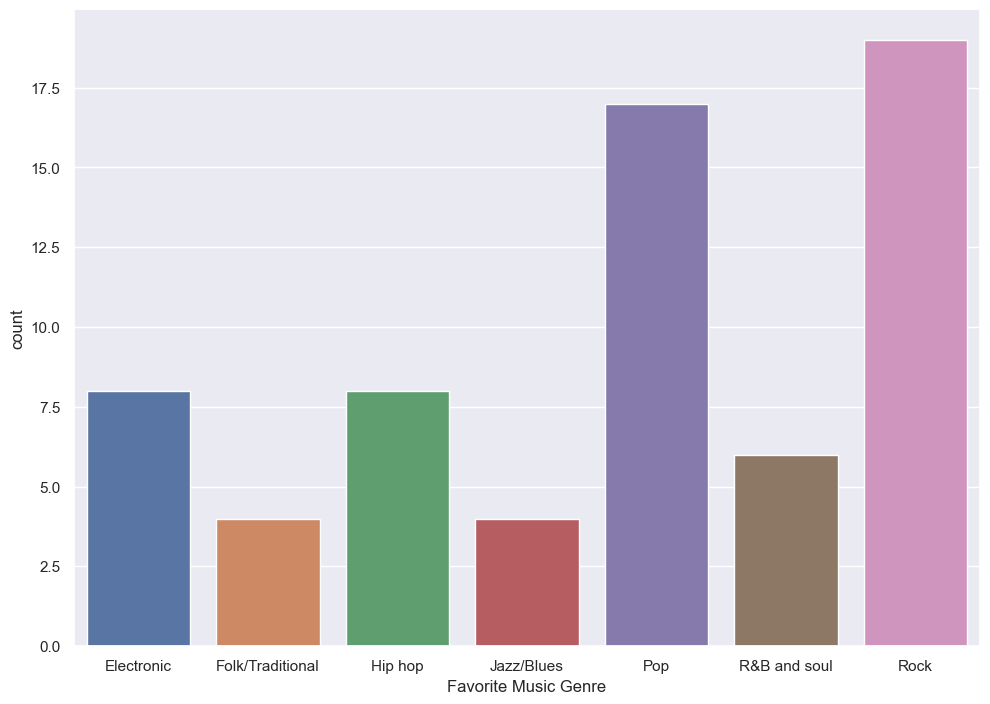

In [51]:
cat_summary(gender_df, 'Favorite Music Genre', plot=True)

### Visualization Data

Proccess in Favorite Soft Drink columns
                 Favorite Soft Drink  Ratio
Coca Cola/Pepsi                   32  48.48
Fanta                             14  21.21
7UP/Sprite                        13  19.70
Other                              7  10.61
****************************************************


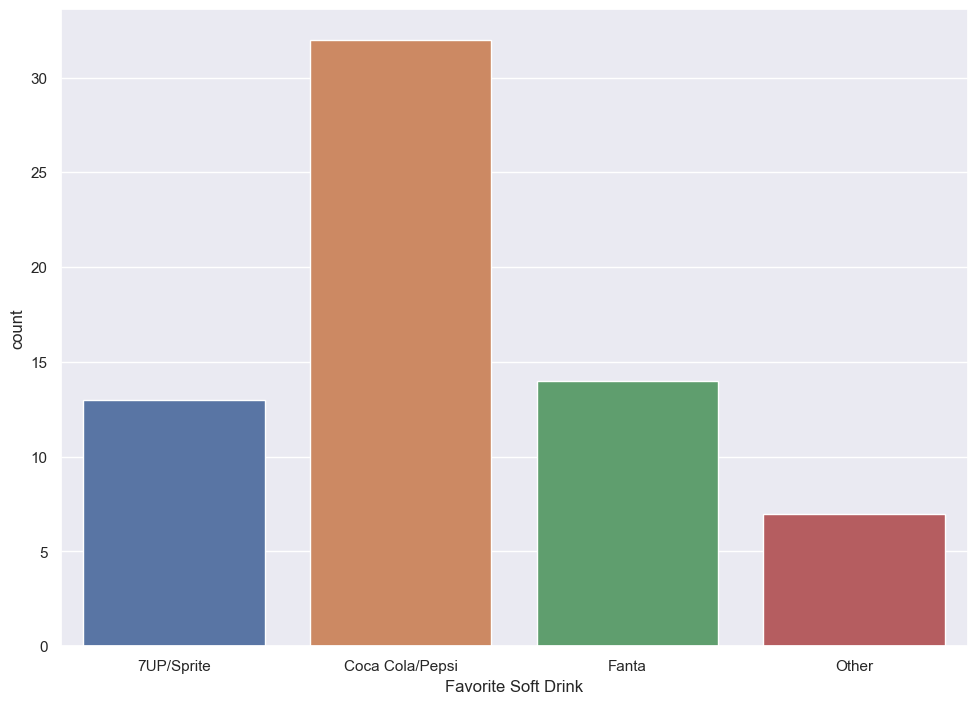

In [52]:
cat_summary(gender_df, 'Favorite Soft Drink', plot=True)

Proccess in Favorite Color columns
         Favorite Color  Ratio
Cool                 37  56.06
Warm                 22  33.33
Neutral               7  10.61
****************************************************


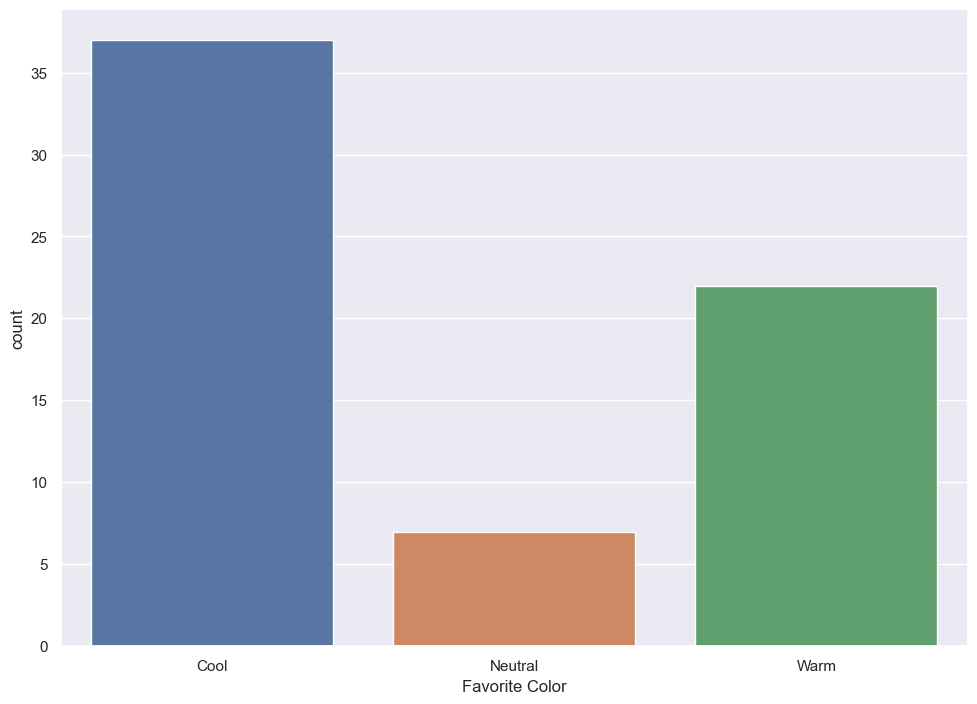

Proccess in Favorite Music Genre columns
                  Favorite Music Genre  Ratio
Rock                                19  28.79
Pop                                 17  25.76
Electronic                           8  12.12
Hip hop                              8  12.12
R&B and soul                         6   9.09
Folk/Traditional                     4   6.06
Jazz/Blues                           4   6.06
****************************************************


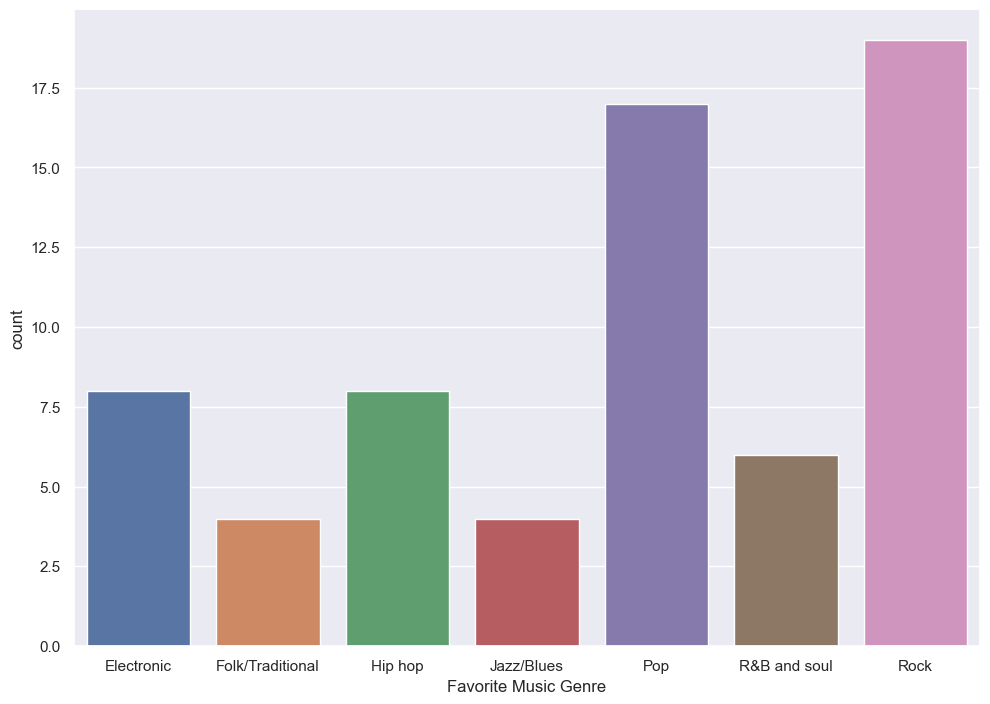

Proccess in Favorite Beverage columns
               Favorite Beverage  Ratio
Doesn't drink                 14  21.21
Beer                          13  19.70
Other                         11  16.67
Wine                          10  15.15
Vodka                          9  13.64
Whiskey                        9  13.64
****************************************************


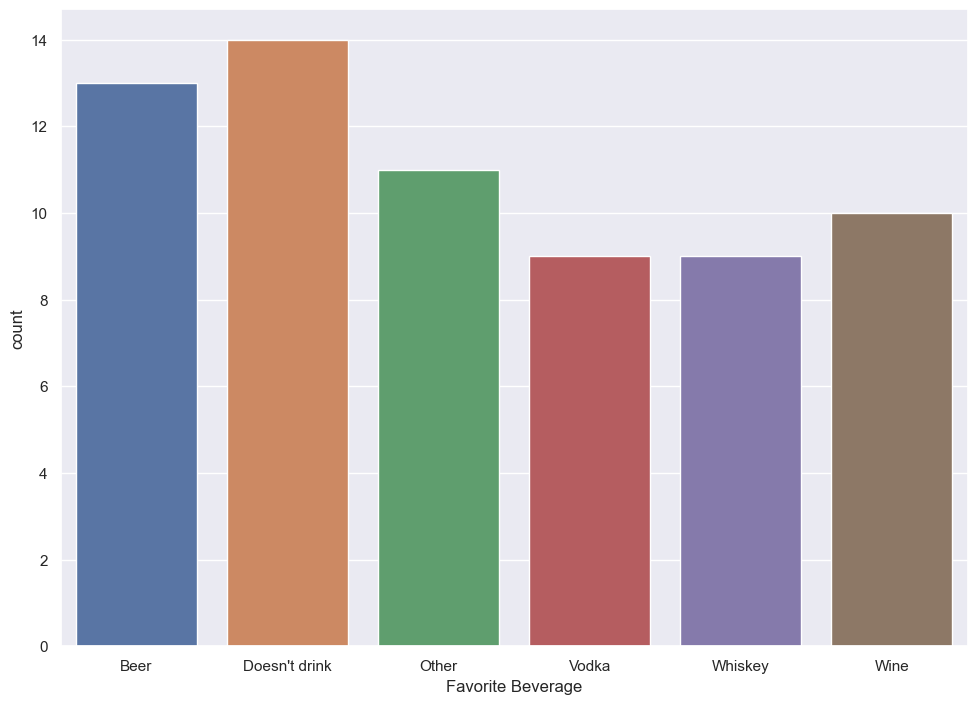

Proccess in Favorite Soft Drink columns
                 Favorite Soft Drink  Ratio
Coca Cola/Pepsi                   32  48.48
Fanta                             14  21.21
7UP/Sprite                        13  19.70
Other                              7  10.61
****************************************************


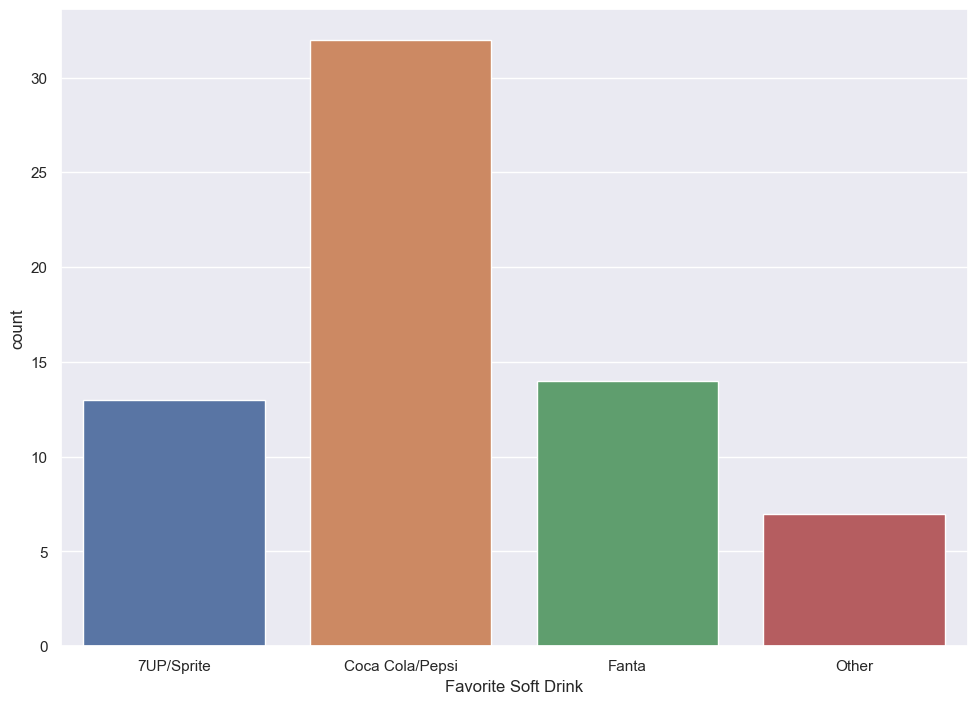

Proccess in Gender columns
   Gender  Ratio
F      33   50.0
M      33   50.0
****************************************************


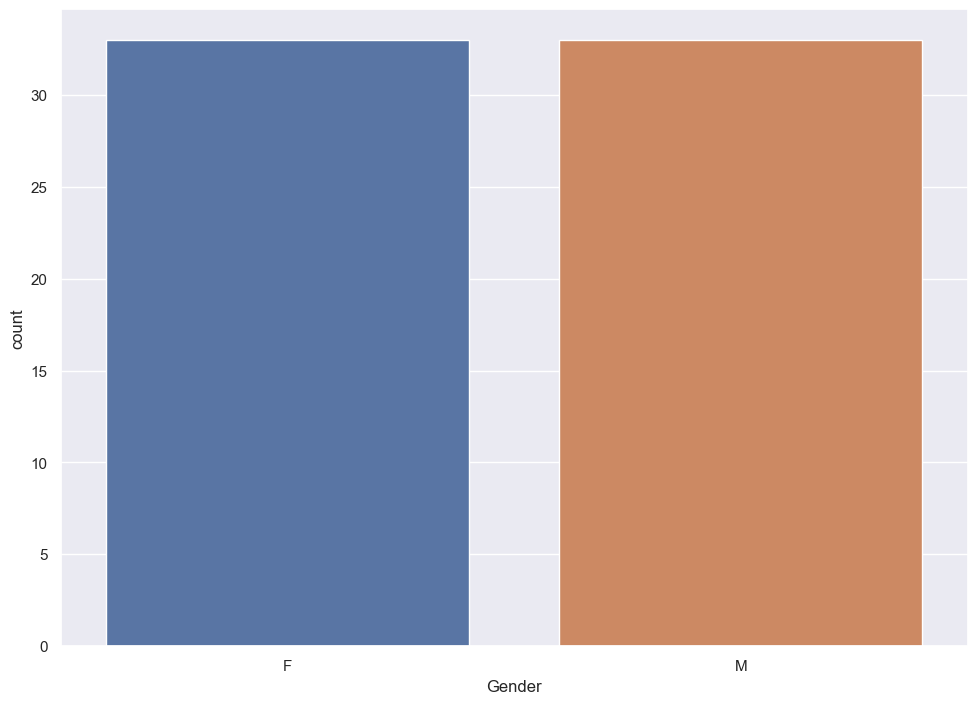

In [53]:
for col in category_cols:
    cat_summary(gender_df, col, plot=True)